# Proyecto Final: Gabriel Lizana - 30 / 7 / 23

#Entrenamiento de un modelo de clasificación de enfermedades cardíacas

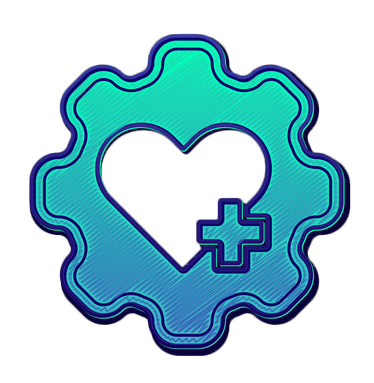

Este proyecto de Data Science tiene como objetivo utilizar una base de datos pública, para modelar un algoritmo de machine learning que pueda predecir enfermedades cardíacas.

Los datos provienen de la *Behavioral Risk Factor Surveillance System* (BRFSS)  que mediante una encuesta telefónica releva datos de salud de la población de EEUU.

A partir de datos de los hábitos de la persona como la dieta, el ejercicio, el consumo de alcohol; como también sus datos biológicos como la altura, peso, edad, género; se propone el entrenamiento de un modelo de clasificación capaz de predecir enfermedades cardíacas.

# Preparación del entorno de trabajo

In [1]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
# %cd '/content/gdrive/MyDrive/CoderHouse/Data Scientist/Entrega/Entrega Final'
print(os.getcwd())
os.chdir("/content/gdrive/MyDrive/CoderHouse/Data Scientist/Entrega/Entrega Final")


Mounted at /content/gdrive
/content


In [2]:
# manipulación de dataframes
import pandas as pd

# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# encoding
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder


In [3]:
#graficos y representación
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from scipy.stats import f_oneway
from sklearn.naive_bayes import GaussianNB

In [5]:
# Herramientas para modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modelos de clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Descripción preliminar

In [6]:
df = pd.read_csv("CVD_cleaned.csv")

Se anticipa que hay cuatro grupos principales de variables en este dataset.

1) *Variables subjetivas*
*   **General_Health:** ¿En qué condición de salud se encuentra?
*   **Checkup:** Última vez que se realizó un control médico

2) *Variables de diagnóstico*
*   **Heart_Disease:** Diagnosticada/o con problemas cardíacos *- Variable objetivo -*
*   **Skin_Cancer:** Diagnosticada/o con Cáncer de piel.
*   **Other_Cancer:** Diagnosticada/o con cualquier otro cáncer.
*   **Depression:** Diagnosticada/o con algún grado de depresión.
*   **Diabetes:** Diagnosticada/o con diabetes, contempla casos agudos y temporales como hiperglucemia por embarazo; pero también considera casos límites como no tener el diagnóstico pero sí tener la etapa previa a diabetes.
*   **Arthritis:** Diagnosticada/o con atritis.

3) *Variables biológicas:*
*   **Sex:** Sexo del encuestado.
*   **Age_Category:** Grupo etario. Se dividen en intervalos de 5 años cada uno, empezando desde los 18 hasta 80. El primer intervalo se extiende hasta los 24, como así también de los 80 en adelante. El resultante es 18-24;25-29;...;75-79;80+
*   **Height_(cm):** Altura en Centímetros
*   **Weight_(kg):** Peso en Kilogramos
*   **BMI:** (Body Mass Index) - Índice de masa corporal. Coeficiente descriptivo de la distribución del peso entre los tejidos del cuerpo. Estimado a partir de la altura y del peso, pero también mensurable con herramientas médicas.

4) *Variables de hábitos*
*   **Smoking_History:** Es fumador activo o con al menos 100 cigarrillos consumidos
*   **Alcohol_Consumption:** Cantidad días que tomó alcohol de los últimos 30 días
*   **Fruit_Consumption:** Cantidad de comidas (desayuno, almuerzo, merienda, cena) que incluían fruta en los últimos 30 días
*   **Green_Vegetables_Consumption:** Cantidad comidas con Vegetales en los últimos 30 días
*   **FriedPotato_Consumption:** Cantidad de comidas con fritura en los últimos 30 días




# Tratamiento previo

El dataset ya está limpio por el autor, según describe, no hay datos nulos.

Se realizará una revisión protocolar y un estudio de los ceros luego de ello.

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [8]:
#Para las variables Categóricas
df.describe(include='object')

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854
unique,5,5,2,2,2,2,2,4,2,2,13,2
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,No
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160196,33434,183590


Como ya sabemos que no hay datos nulos, no es necesario manipular mucho las variables categóricas.

In [9]:
#Para las variables Numéricas
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


A partir del describe tenemos una buena previsualización de que no hay ceros en las columnas *Height*, *Weight* o *BMI* lo que es una buena señal de la limpieza previa de los datos.

Por último se comprueba que no haya registros duplicados

In [10]:
duplicates = df.duplicated().sum()
print("Registros duplicados: " , duplicates)

Registros duplicados:  80


# Análisis

Primero realizamos un estudio preliminar, de las distribuciones de los datos numéricos, usando gráficas.

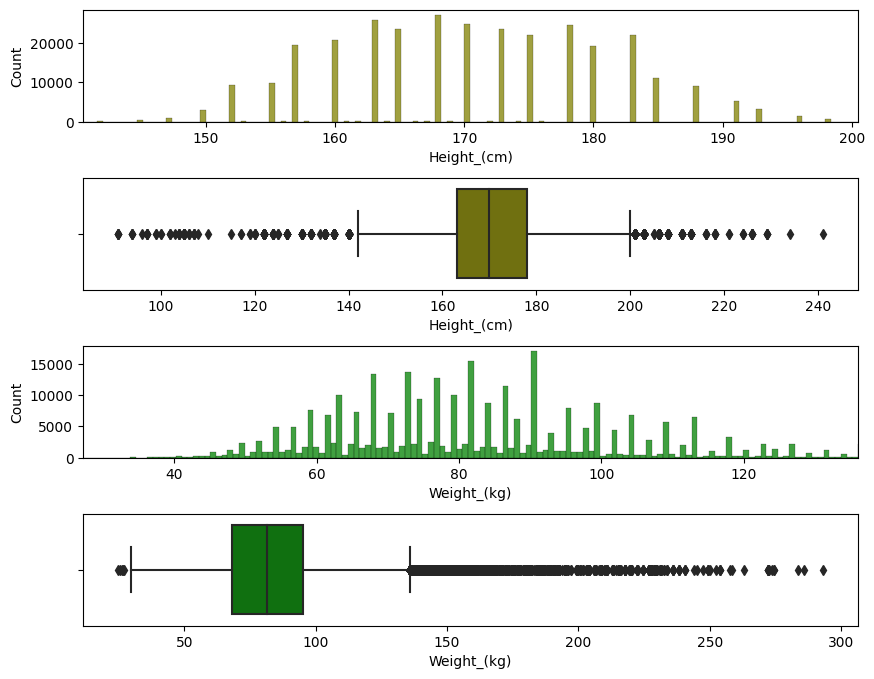

In [11]:
#calculamos los rangos intercuantiles de Altura
h_q1 = df['Height_(cm)'].quantile(0.25)
h_q3 = df['Height_(cm)'].quantile(0.75)

# rango intercuartil de height
h_iqr = h_q3 - h_q1

# límites superiores e inferiores
h_lower_bound = h_q1-(1.5*h_iqr)
h_upper_bound = h_q3+(1.5*h_iqr)

#calculamos los rangos intercuantiles de Peso
w_q1 = df['Weight_(kg)'].quantile(0.25)
w_q3 = df['Weight_(kg)'].quantile(0.75)

# rango intercuartil de weight
w_iqr = w_q3 - w_q1

# límites superiores e inferiores
w_lower_bound = w_q1-(1.5*w_iqr)
w_upper_bound = w_q3+(1.5*w_iqr)


fig, (ax1, ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))

sns.histplot(data=df['Height_(cm)'],ax=ax1,color="olive")
ax1.set_xlim([h_lower_bound,h_upper_bound])

sns.boxplot(x=df['Height_(cm)'],ax=ax2,color="olive")

sns.histplot(data=df['Weight_(kg)'],ax=ax3,color="green")
ax3.set_xlim([w_lower_bound,w_upper_bound])

sns.boxplot(x=df['Weight_(kg)'],ax=ax4,color="green")

# Ajustar el espacio entre los gráficos
plt.subplots_adjust(hspace=0.5)

# Mostrar la figura
plt.show()

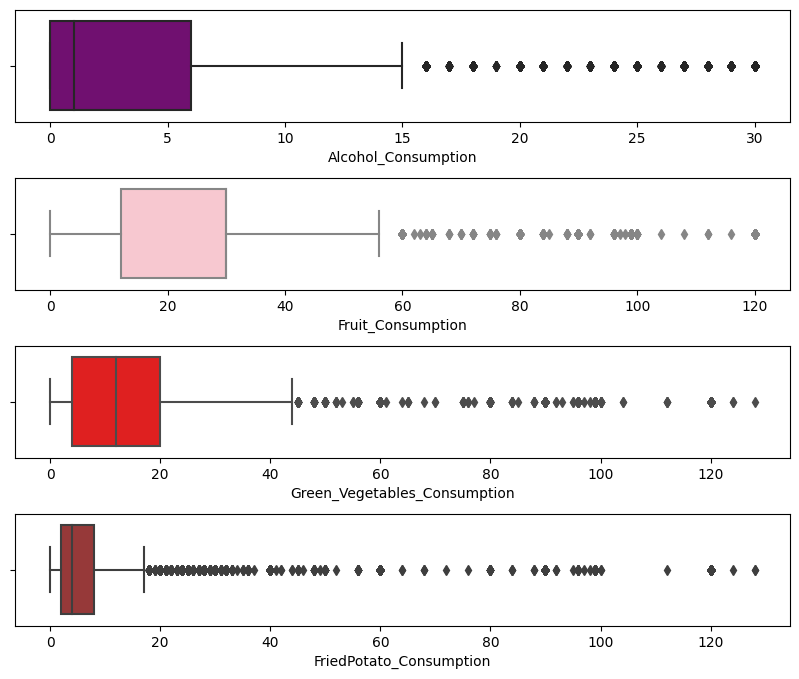

In [12]:
fig, (ax1, ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))

sns.boxplot(x=df['Alcohol_Consumption'],color='purple' ,ax=ax1)
sns.boxplot(x=df['Fruit_Consumption'],color='pink', ax=ax2)
sns.boxplot(x=df['Green_Vegetables_Consumption'],color='red',ax=ax3)
sns.boxplot(x=df['FriedPotato_Consumption'],color='brown',ax=ax4)

# Ajustar el espacio entre los gráficos
plt.subplots_adjust(hspace=0.5)

# Mostrar la figura
plt.show()

Para este estudio particular, los outliers tienen información importante a incluír porque son los casos límites que traen consigo la posibilidad de tener enfermedades cardíacas, según los estudios disponibles por la medicina actual.

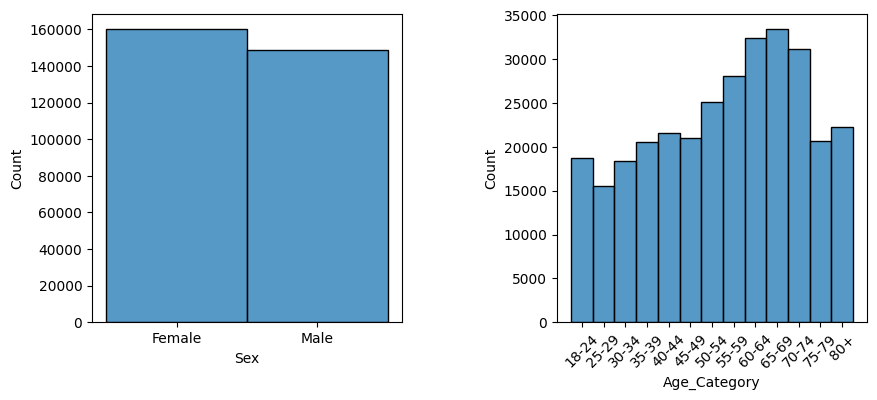

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

# Crear histograma del género
sns.histplot(data=df['Sex'],ax=ax1)

# Crear histograma de las edades
sns.histplot(data=df['Age_Category'].sort_values(),ax=ax2)

plt.subplots_adjust(wspace=0.5)

#rotamos las etiquetas
plt.xticks(rotation=45)
plt.show()

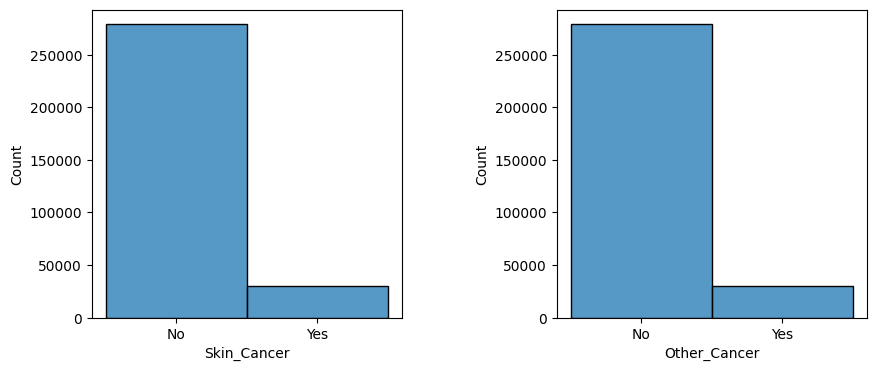

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

sns.histplot (data=df,x='Skin_Cancer',ax=ax1)
sns.histplot (data=df,x='Other_Cancer',ax=ax2)

plt.subplots_adjust(wspace=0.5)

plt.show()

# Transformación de variables

codificamos las variables categóricas

In [15]:
# definimos el dataframe codificado (dfc) y quitamos variables redundantes
dfc = df.drop(columns=["Checkup","General_Health"])

dfc["Heart_Disease"].replace(('Yes', 'No'), (1, 0), inplace=True)
dfc["Exercise"].replace(('Yes', 'No'), (1, 0), inplace=True)
dfc["Skin_Cancer"].replace(('Yes', 'No'), (1, 0), inplace=True)
dfc["Other_Cancer"].replace(('Yes', 'No'), (1, 0), inplace=True)
dfc["Depression"].replace(('Yes', 'No'), (1, 0), inplace=True)
#En el caso de diabetes, se simplifica el estudio a dos categorías
dfc["Diabetes"].replace(('Yes', 'No','No, pre-diabetes or borderline diabetes','Yes, but female told only during pregnancy'), (1, 0, 1, 0), inplace=True)
dfc["Arthritis"].replace(('Yes', 'No'), (1, 0), inplace=True)
dfc["Sex"].replace(('Male', 'Female'), (1, 0), inplace=True)
dfc["Smoking_History"].replace(('Yes', 'No'), (1, 0), inplace=True)

# AC - Age_Category
encoder_AC = OrdinalEncoder()
dfc["Age_Category"] = encoder_AC.fit_transform(df[["Age_Category"]])



In [27]:
dfc.head(3)

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,0,0,0,0,0,1,0,10.0,-1.934250,-2.386180,-2.159696,1,0.000000,0.25,0.125000,0.09375
1,0,1,0,0,0,1,0,0,10.0,-0.526857,-0.303547,-0.051548,0,0.000000,0.25,0.000000,0.03125
2,1,0,0,0,0,1,0,0,8.0,-0.714510,0.227770,0.742649,0,0.133333,0.10,0.023438,0.12500


Escalamos las variables numéricas

In [26]:
mM_scaler = MinMaxScaler()
mM_columns = ['Alcohol_Consumption',	'Fruit_Consumption',	'Green_Vegetables_Consumption',	'FriedPotato_Consumption']

std_scaler = StandardScaler()
std_columns = ['Height_(cm)',	'Weight_(kg)',	'BMI']

for col in mM_columns:
  dfc[col] = mM_scaler.fit_transform(dfc[[col]])

for col in std_columns:
  dfc[col] = std_scaler.fit_transform(dfc[[col]])

# Estudio de correlación

In [ ]:
columns = ['Heart_Disease','Skin_Cancer',	'Other_Cancer'	,'Depression',	'Diabetes',	'Arthritis',	'Height_(cm)'	,'Weight_(kg)','BMI','Age_Category',	'Smoking_History','Alcohol_Consumption', 'FriedPotato_Consumption']

# Calculate the correlation matrix for the selected columns
corr_matrix = dfc[columns].corr()
corr_table = corr_matrix['Heart_Disease'].drop('Heart_Disease')

print("Correlación lineal con enfermedades cardíacas:")
print (corr_table)

Correlación lineal con enfermedades cardíacas:
Skin_Cancer                0.090848
Other_Cancer               0.092387
Depression                 0.032526
Diabetes                   0.177285
Arthritis                  0.153913
Height_(cm)                0.015780
Weight_(kg)                0.045875
BMI                        0.042666
Age_Category               0.229011
Smoking_History            0.107797
Alcohol_Consumption       -0.036569
FriedPotato_Consumption   -0.009227
Name: Heart_Disease, dtype: float64


In [18]:
y = dfc['Heart_Disease']
x = dfc.drop(columns=['Heart_Disease'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

Modelamos con un clasificador de árbol, que es rápido y observamos el puntaje que nos arroja

In [22]:
# Modelando con el arbol de decisión

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Accuracy de Decision Tree:\n",tree.score(X_test, y_test))

Accuracy de Decision Tree:
 0.855945812935478


Nos ofrece una presición bastante superior a las correlaciones lineales previamente vistas.

Pasamos a implementar un modelo más robusto a ver si se puede mejorar la predicción

In [20]:
# Apply Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb.predict(X_test)

In [21]:
# Print classification report for Naive Bayes
print("Classification report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))

Classification report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91     70985
           1       0.22      0.39      0.28      6229

    accuracy                           0.84     77214
   macro avg       0.58      0.63      0.60     77214
weighted avg       0.88      0.84      0.86     77214



In [30]:
#Ahora comparemos con GBM

gbrt = GradientBoostingClassifier(random_state = 42)
gbrt.fit(X_train, y_train)
print("Accuracy de Gradient Boosting:\n",gbrt.score(X_test, y_test))

y_pred_gbc = gbrt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbc)
print("Matriz de confusión:\n",cm)



Accuracy de Gradient Boosting:
 0.919250395006087
Matriz de confusión:
 [[70906    79]
 [ 6156    73]]


# Fuentes

Dataset:
https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

Datos del censo:
https://www.cdc.gov/brfss/annual_data/annual_2021.html

Preguntas de la encuesta:
https://www.cdc.gov/brfss/questionnaires/pdf-ques/2021-BRFSS-Questionnaire-1-19-2022-508.pdf